# IR 14. 정적분의 계산(2007년 9월 평가원)

> "작성완료"

- toc:true
- branch: master
- badges: true
- comments: true
- [R]

---
# Introduce R 
- lecture: Introduce R_11nd week of lectures
- lecture date: 2021-11-18
- lecturer: Guebin choi
- study date: 2022-02-27
- author: Kione kim
---

In [ ]:
#hide
options(jupyter.plot_scale=3)
options(jupyter.display_mimetypes=c("text/html"))
options(jupyter.rich_display=FALSE)
options(repr.plot.width=6,repr.plot.height=6,repr.plot.res=300)
options(max.print=1000)

In [ ]:
library(tidyverse)

-- Attaching packages ------------------------------------------------------------------------------- tidyverse 1.3.1 --

v ggplot2 3.3.5     v purrr   0.3.4
v tibble  3.1.6     v dplyr   1.0.7
v tidyr   1.1.4     v stringr 1.4.0
v readr   2.1.1     v forcats 0.5.1

-- Conflicts ---------------------------------------------------------------------------------- tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()



## 정적분의 계산(2007년 9월 평가원)

`문제:` $\int_0^2|x^2(x-1)|dx$의 값은?

### 데이터 정리

In [ ]:
x = seq(0,2,0.01)
x

  [1] 0.00 0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.10 0.11 0.12 0.13 0.14
 [16] 0.15 0.16 0.17 0.18 0.19 0.20 0.21 0.22 0.23 0.24 0.25 0.26 0.27 0.28 0.29
 [31] 0.30 0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.40 0.41 0.42 0.43 0.44
 [46] 0.45 0.46 0.47 0.48 0.49 0.50 0.51 0.52 0.53 0.54 0.55 0.56 0.57 0.58 0.59
 [61] 0.60 0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69 0.70 0.71 0.72 0.73 0.74
 [76] 0.75 0.76 0.77 0.78 0.79 0.80 0.81 0.82 0.83 0.84 0.85 0.86 0.87 0.88 0.89
 [91] 0.90 0.91 0.92 0.93 0.94 0.95 0.96 0.97 0.98 0.99 1.00 1.01 1.02 1.03 1.04
[106] 1.05 1.06 1.07 1.08 1.09 1.10 1.11 1.12 1.13 1.14 1.15 1.16 1.17 1.18 1.19
[121] 1.20 1.21 1.22 1.23 1.24 1.25 1.26 1.27 1.28 1.29 1.30 1.31 1.32 1.33 1.34
[136] 1.35 1.36 1.37 1.38 1.39 1.40 1.41 1.42 1.43 1.44 1.45 1.46 1.47 1.48 1.49
[151] 1.50 1.51 1.52 1.53 1.54 1.55 1.56 1.57 1.58 1.59 1.60 1.61 1.62 1.63 1.64
[166] 1.65 1.66 1.67 1.68 1.69 1.70 1.71 1.72 1.73 1.74 1.75 1.76 1.77 1.78 1.79
[181] 1.80 1.81 1.82 1.83 1.

In [ ]:
y = abs((x^2)*(x-1))
y 

  [1] 0.000000 0.000099 0.000392 0.000873 0.001536 0.002375 0.003384 0.004557
  [9] 0.005888 0.007371 0.009000 0.010769 0.012672 0.014703 0.016856 0.019125
 [17] 0.021504 0.023987 0.026568 0.029241 0.032000 0.034839 0.037752 0.040733
 [25] 0.043776 0.046875 0.050024 0.053217 0.056448 0.059711 0.063000 0.066309
 [33] 0.069632 0.072963 0.076296 0.079625 0.082944 0.086247 0.089528 0.092781
 [41] 0.096000 0.099179 0.102312 0.105393 0.108416 0.111375 0.114264 0.117077
 [49] 0.119808 0.122451 0.125000 0.127449 0.129792 0.132023 0.134136 0.136125
 [57] 0.137984 0.139707 0.141288 0.142721 0.144000 0.145119 0.146072 0.146853
 [65] 0.147456 0.147875 0.148104 0.148137 0.147968 0.147591 0.147000 0.146189
 [73] 0.145152 0.143883 0.142376 0.140625 0.138624 0.136367 0.133848 0.131061
 [81] 0.128000 0.124659 0.121032 0.117113 0.112896 0.108375 0.103544 0.098397
 [89] 0.092928 0.087131 0.081000 0.074529 0.067712 0.060543 0.053016 0.045125
 [97] 0.036864 0.028227 0.019208 0.009801 0.000000 0.010201 0.02

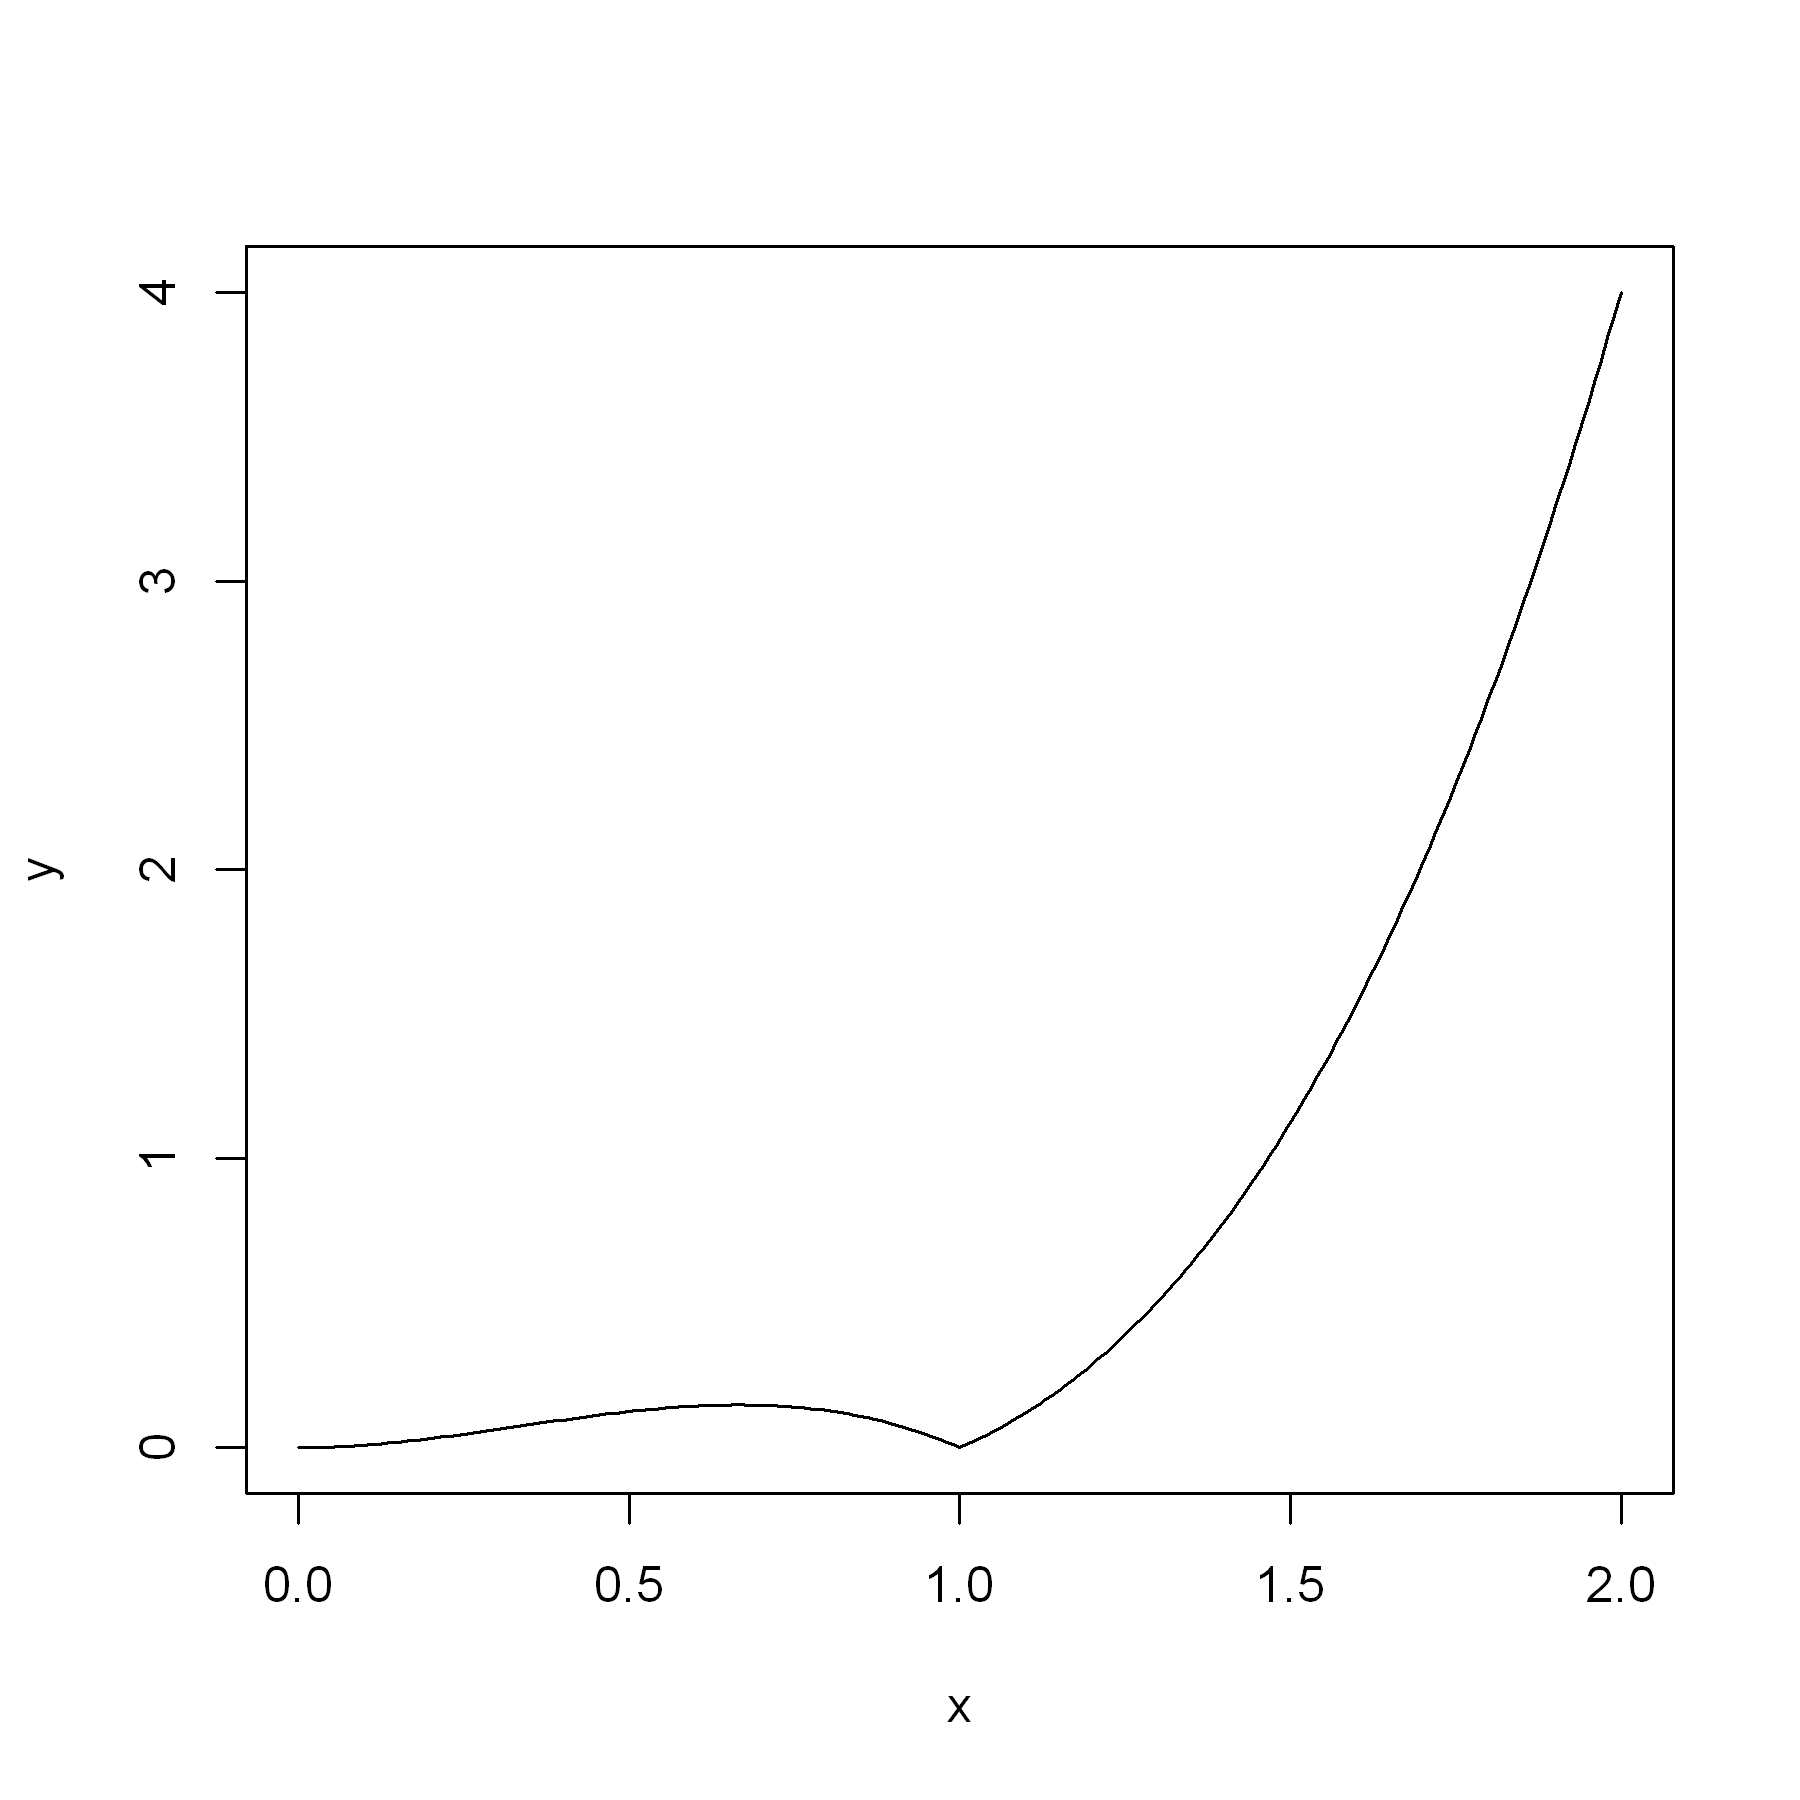

In [ ]:
plot(x,y,'l')

### 풀이1: 몬테카를로 방법 이용

```  R
풀이법: 

1. 가로가 2 세로가 4인 직사각형에 임의의 점을 뿌린다.

2. 전체 점의 수와 선 아래 위치한 점의 수를 센다.

3. 점의 갯수를 바탕으로 넓이를 추론한다.
```

In [ ]:
xx=runif(10000) # 0~1 사이의 값을 랜덤으로 만 개 추출한다

In [ ]:
xx=xx*2

- $0, ... ,1$ 사이에 위치한 만 개의 값에 $×2$하면 $0, ... , 2$ 사이에 만 개의 값을 추출한 효과를 줄 수 있다.

In [ ]:
yy=runif(10000)*4 # 마찬가지로 0~4 사이의 값을 만 개 추출

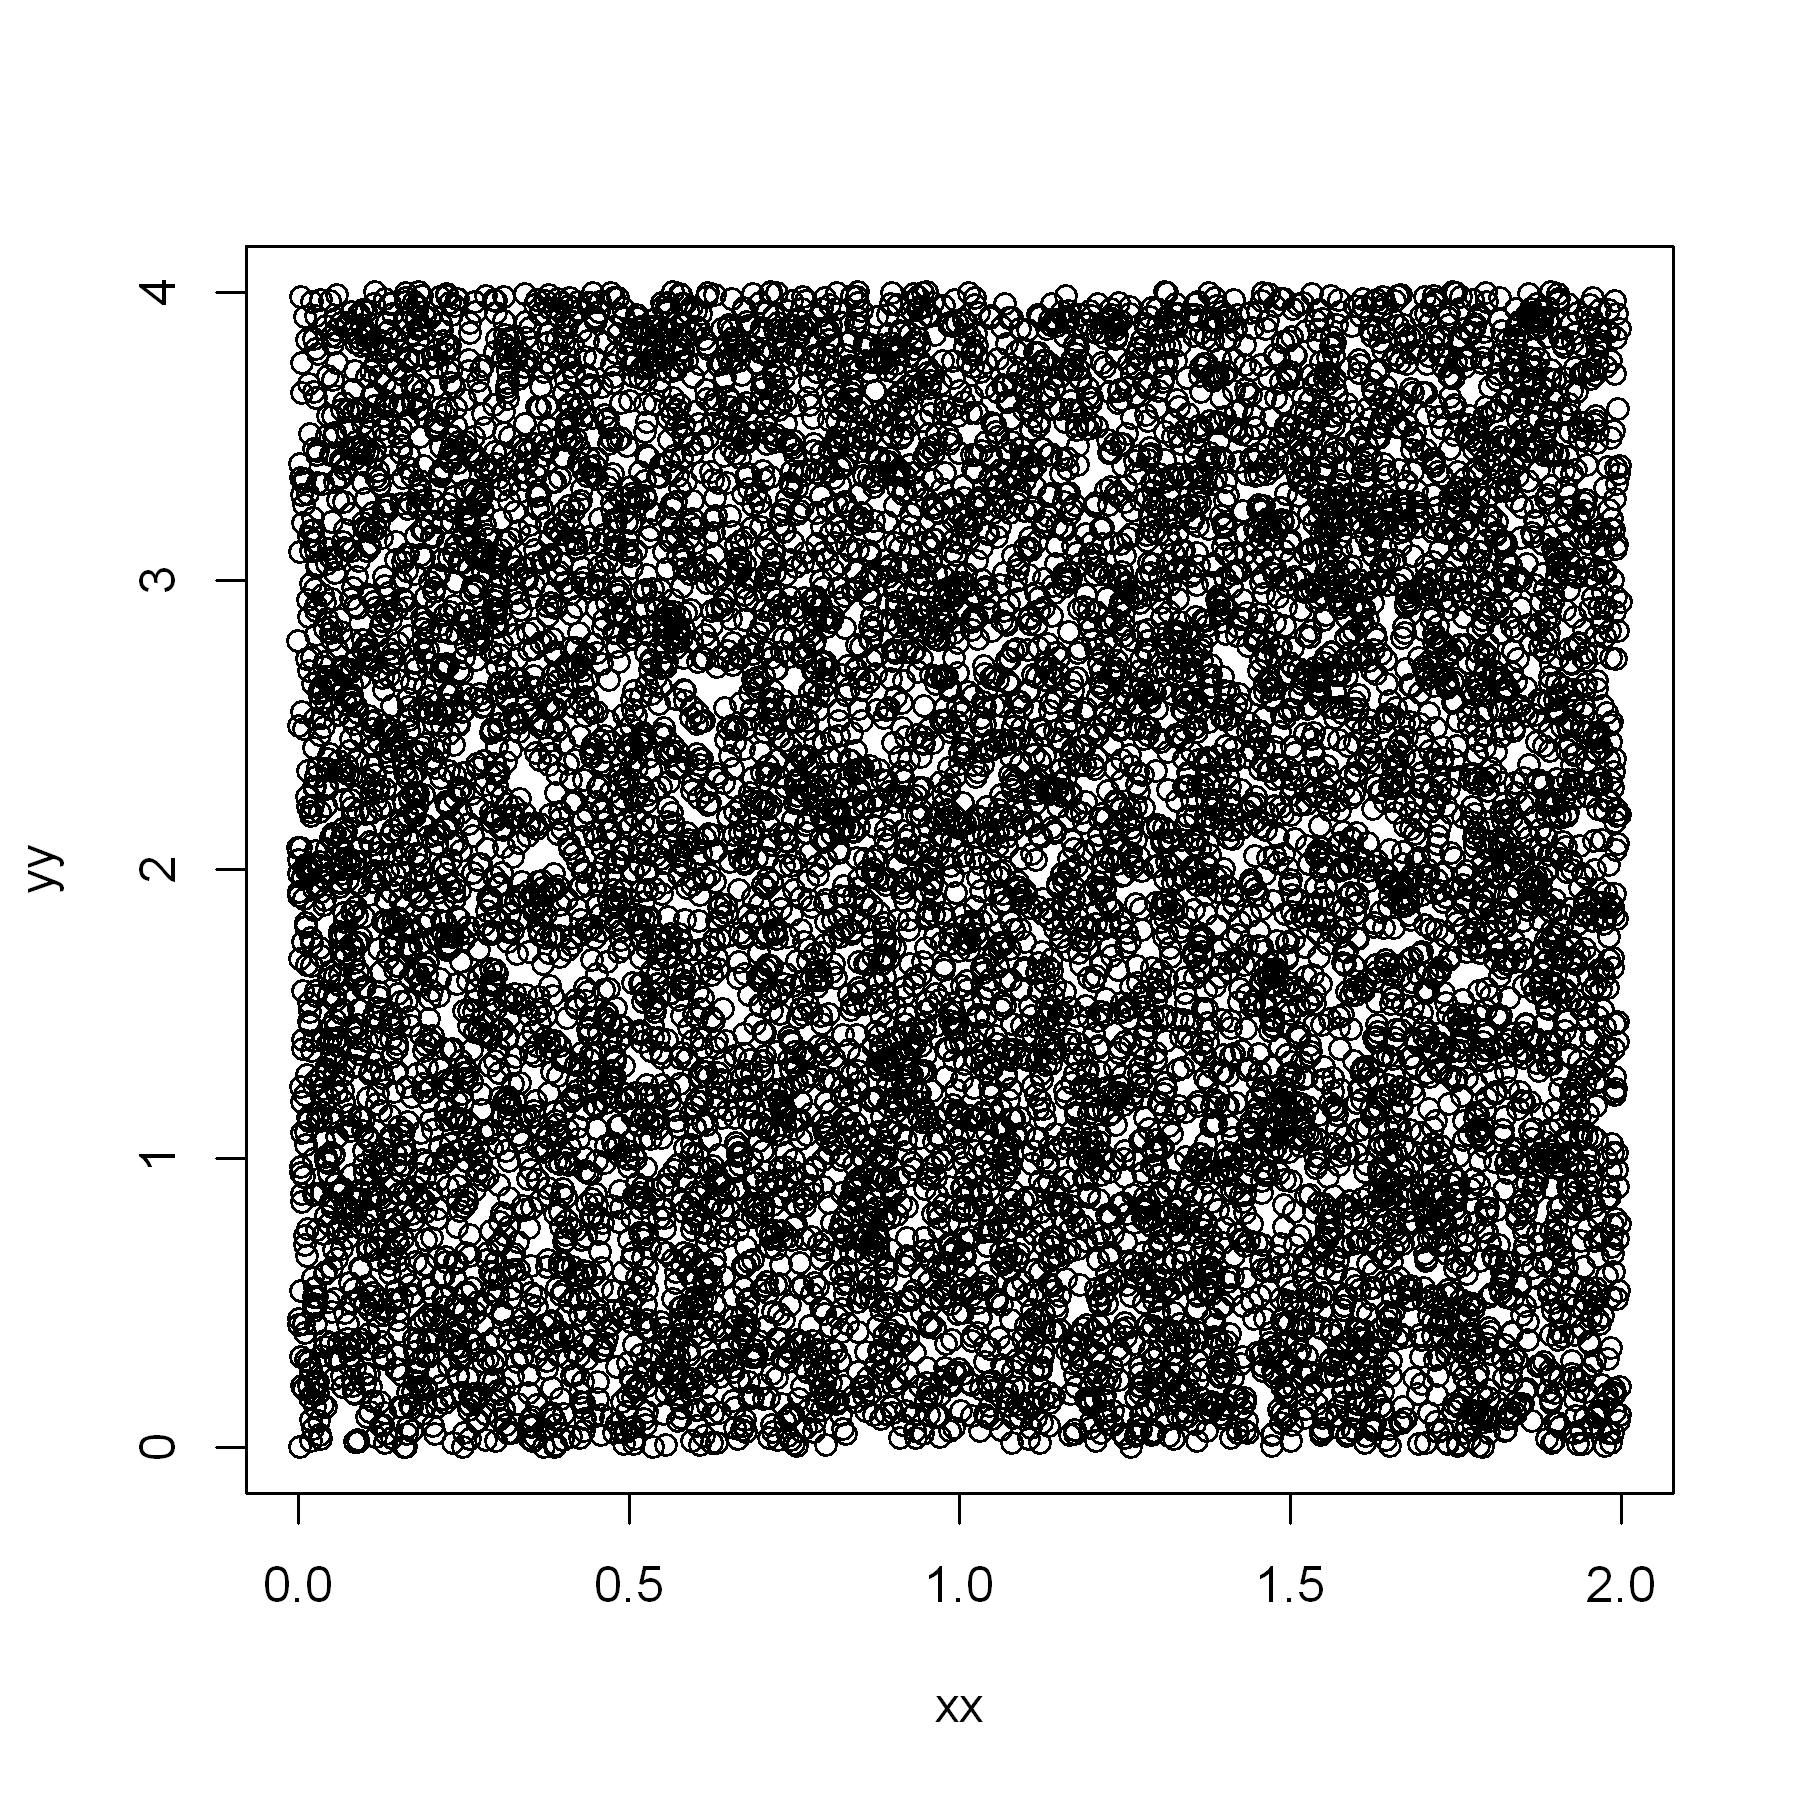

In [ ]:
plot(xx,yy)

- 가로가 2, 세로가 4인 직사각형에 랜덤으로 2만개의 점이 찍혔음을 알 수 있다.

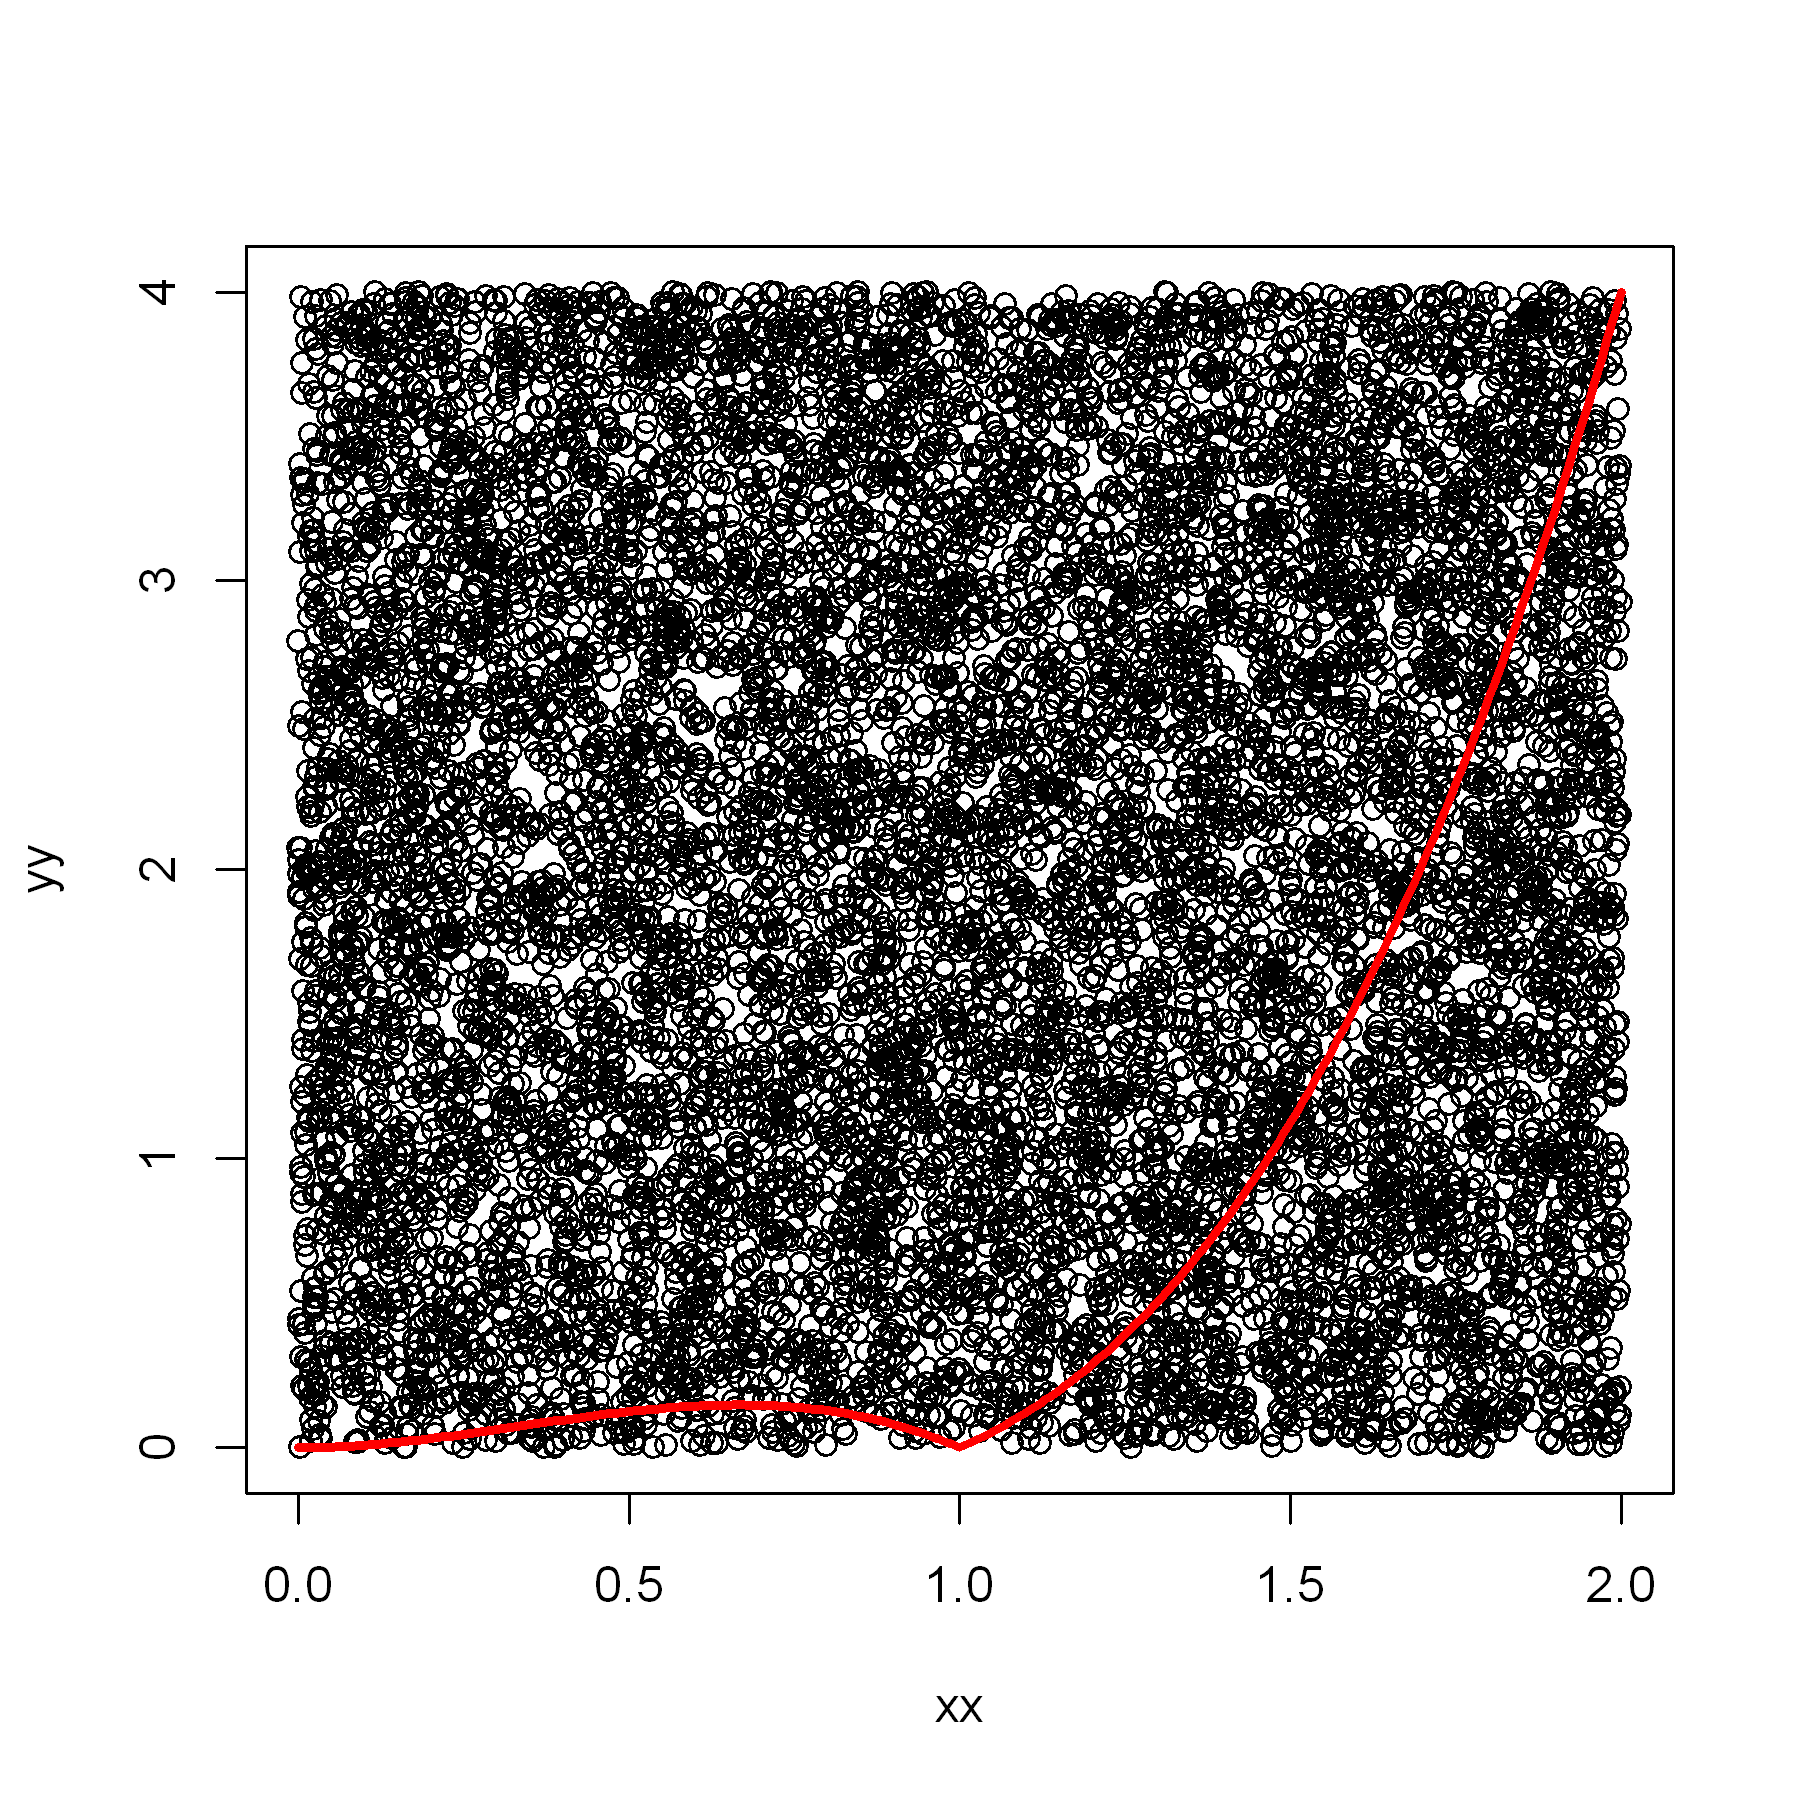

In [ ]:
plot(xx,yy)
lines(x,y,col='red',lwd=3)

``` R
목표: 이제 붉은 선 아래에 위치한 점들의 개수를 세기

- 다음과 같이 xx에 해당하는 yy의 값이 선 아래에 위치하면 TRUE, 위에 위치하면 FALSE를 반환하는 함수를 만들고
- xx와 yy의 첫 번째 원소를 예로 들어 확인하자.

```

In [ ]:
down <- function(xx,yy){
    yy < abs((xx^2)*(xx-1))
}

In [ ]:
c(xx[1],yy[1])

[1] 1.874696 3.872099

- 이 값은 xx의 첫번째 원소의 값, yy의 첫번째 원소의 값이다.

In [ ]:
abs((xx[1]^2)*(xx[1]-1))

[1] 3.074107

- 이 값은 xx의 첫번째 원소가 선과 만나는 점에서의 yy값이다.

In [ ]:
down(xx[1],yy[1])

[1] FALSE

- 위의 yy[1]이 xx[1]과 선이 만나는 점에서의 yy값 보다 크므로 함수는 FALSE를 반환하였다.

`-` 다시 정리해보자.

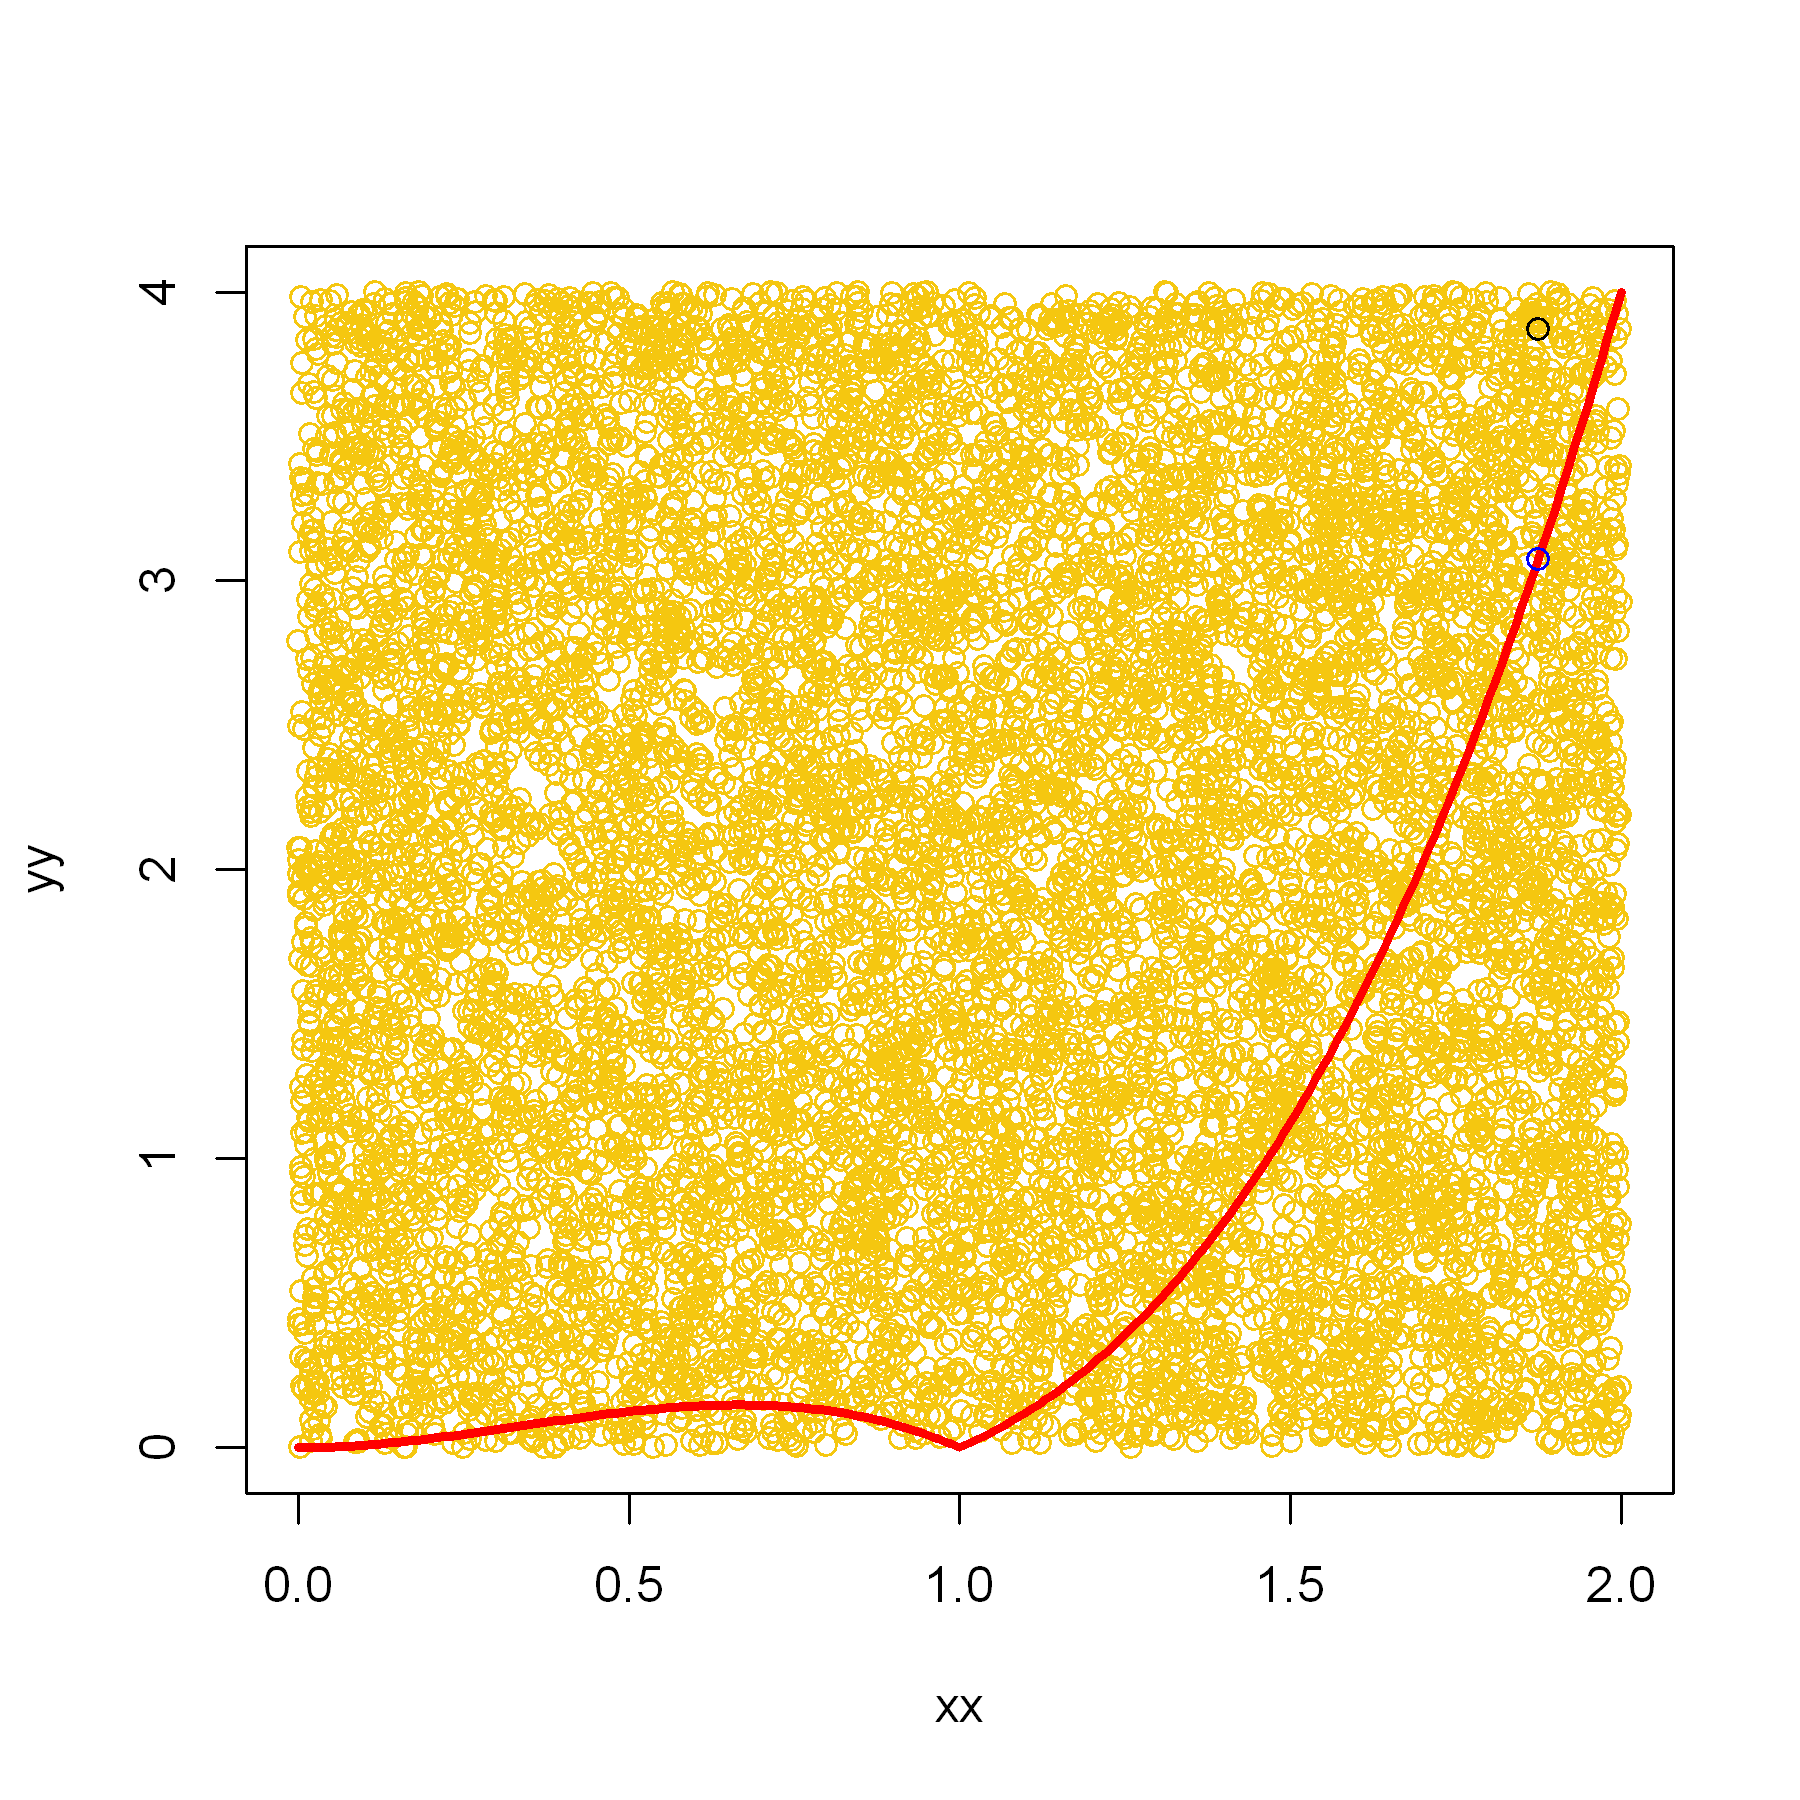

In [ ]:
plot(xx,yy,col=7)
lines(x,y,col='red',lwd=3)
points(xx[1],yy[1])
points(xx[1],abs((xx[1]^2)*(xx[1]-1)),col='blue')

- 위에 있는 점이 아래 있는 점보다 큰 것을 알 수 있다.

In [ ]:
dot <- c()
for (i in 1:10000) dot[i] = down(xx[i],yy[i])

In [ ]:
head(dot,30)

 [1] FALSE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE
[13] FALSE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE
[25] FALSE  TRUE  TRUE FALSE FALSE FALSE

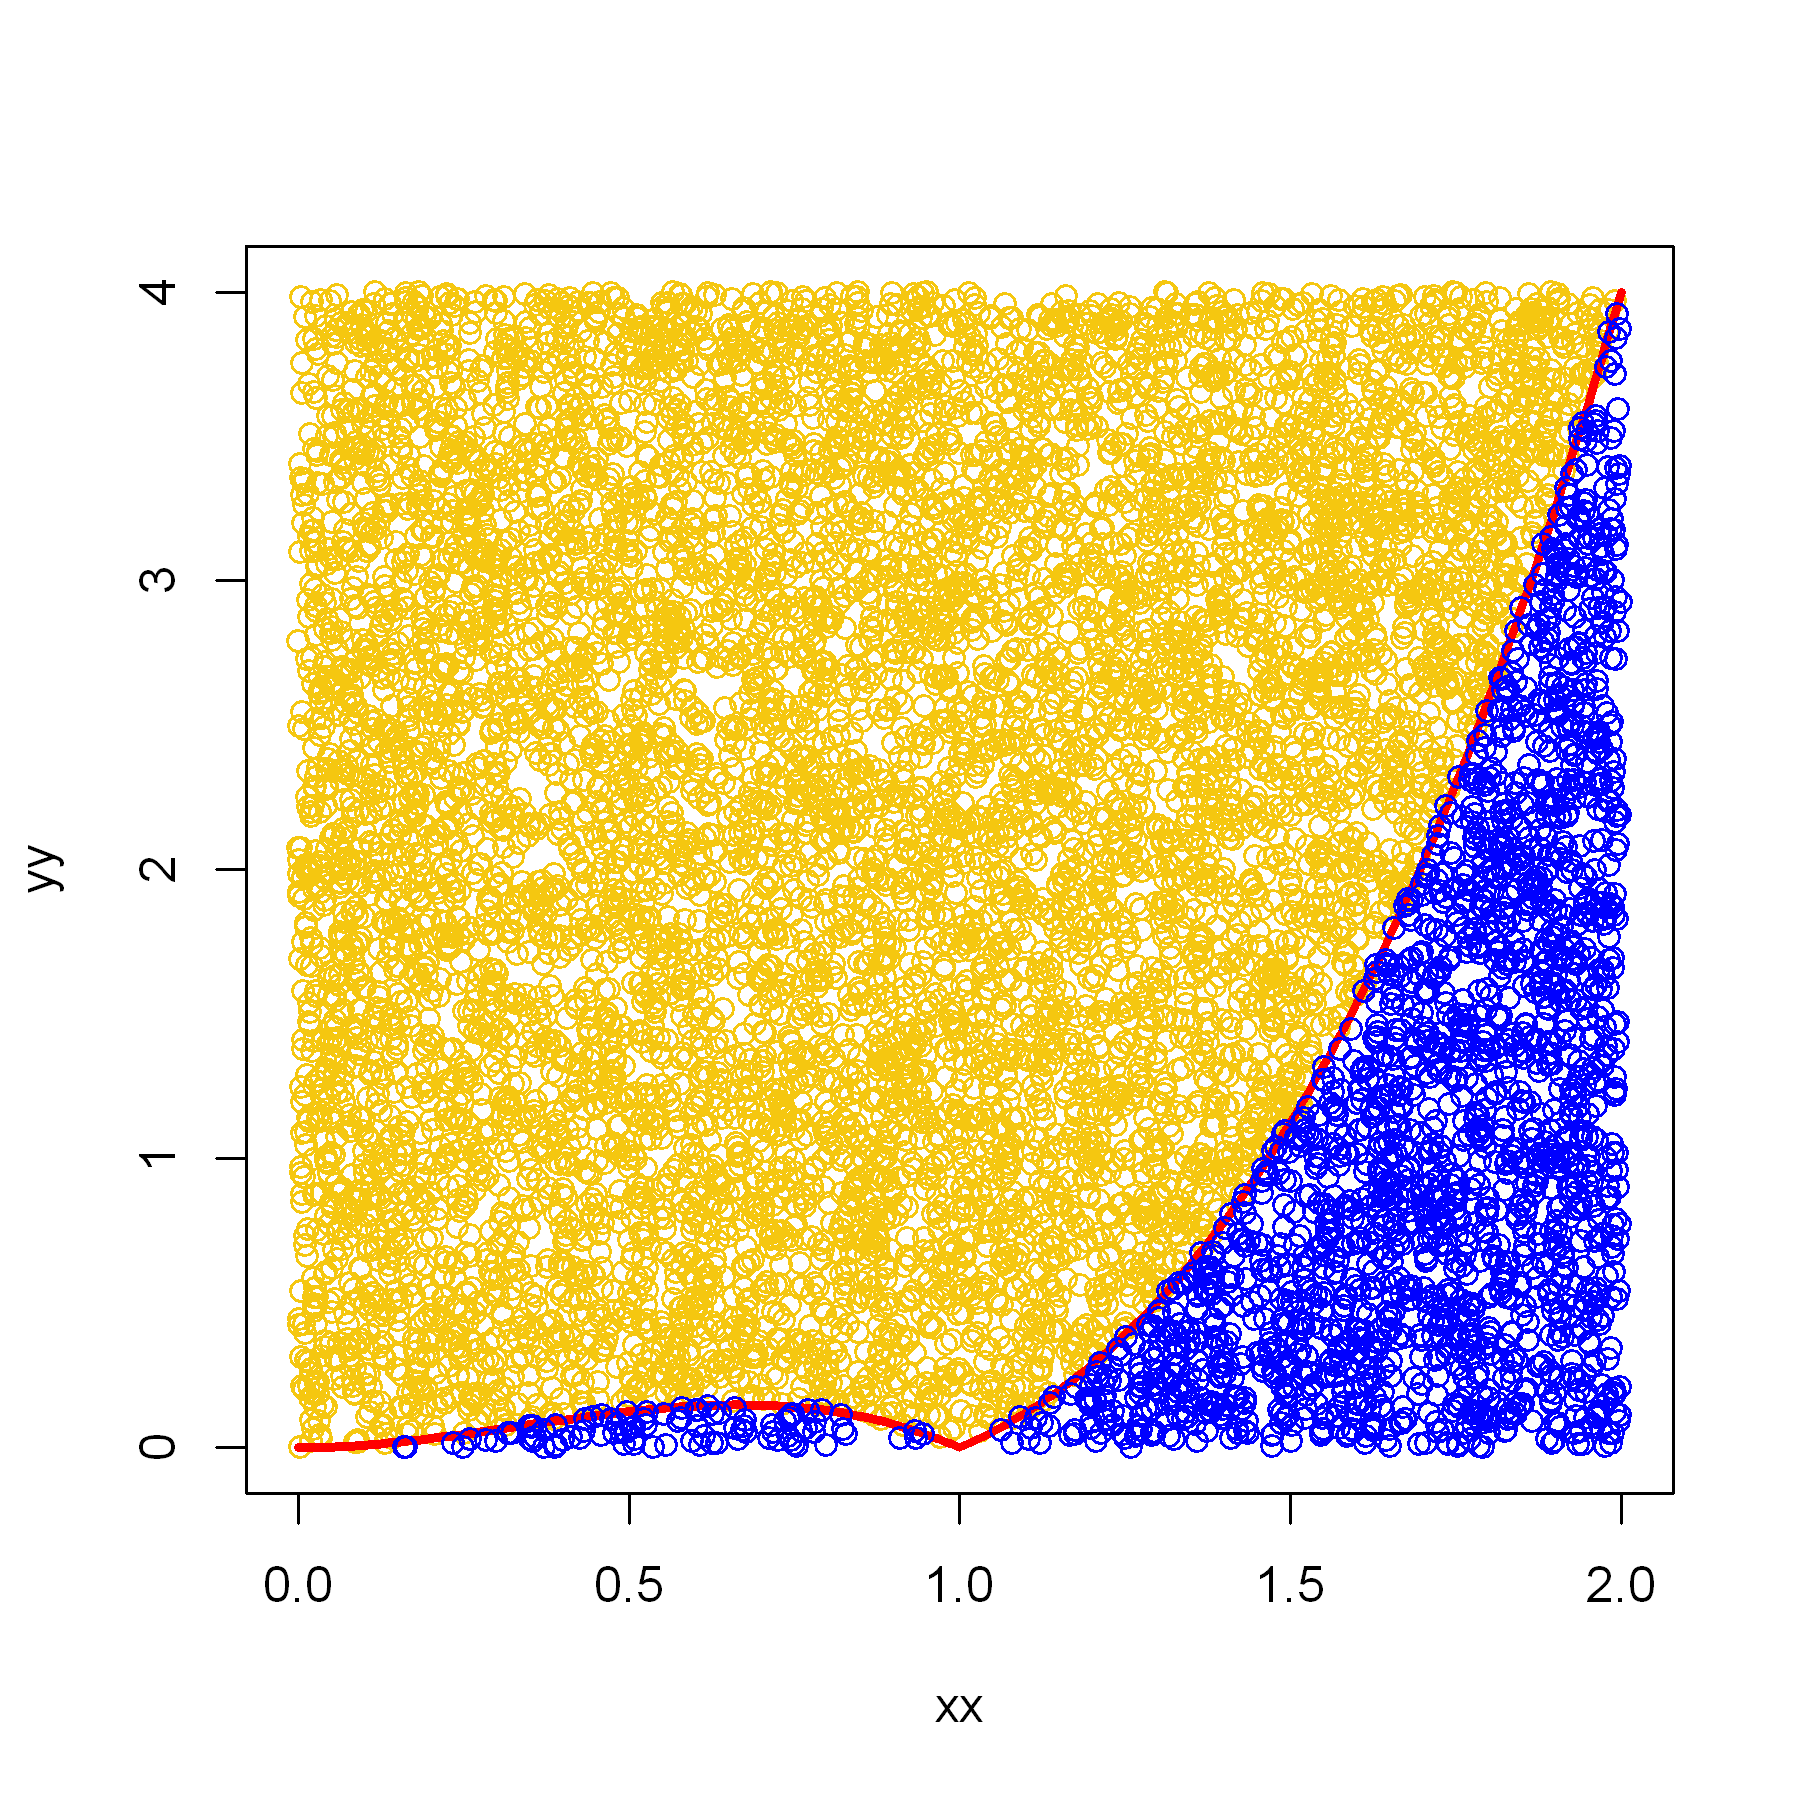

In [ ]:
plot(xx,yy,col=7)
lines(x,y,col='red',lwd=3)
points(xx[dot],yy[dot],col='blue')

`-` 선 아래 위치한 점들의 갯수는 dot의 수이다. (dot는 모두 TRUE이기 때문)

In [ ]:
sum(dot)

[1] 1877

In [ ]:
length(xx[dot])
length(yy[dot])

[1] 1877

[1] 1877

- 따라서 선 아래의 면적은 $$\frac{s}{8} \approx \frac{1879}{10000}$$

s = 구하고자 하는 면적   
8 = 2 × 4

In [ ]:
(1877/10000)*8

[1] 1.5016

- 근사적 답은 $(1877/10000)*8$ 인 $1.5016$ 이다.

`-` 이와 같은 방법을 몬테카를로 방법이라 한다. 이는 복잡한 함수에 대해서도 정적분의 값을 근사적으로 계산할 수 있다는 장점이 있기에 익히면 유용하다.

### 풀이2: abs() 함수 이용

In [ ]:
sum(yy < abs(xx^2 * (xx-1)))

[1] 1877

## 랜덤변수

### 랜덤변수를 생성하는 방법

#### 예제1. 균등분포(1)

`1)` 구간 [0,1]에서 랜덤하게 하나를 뽑는 것

In [ ]:
runif(1)

[1] 0.2862942

`2)` 구간 [0,1]에서 랜덤하게 10개를 뽑는 것

In [ ]:
runif(10)

 [1] 0.80938947 0.88995324 0.21332789 0.49211215 0.03231788 0.68318525
 [7] 0.50385924 0.51111966 0.13132300 0.86410394

`3)` 랜덤하게 뽑히는 것인지 확인하기 위해 10000개를 뽑고 평균이 0.5 근처인지 확인

In [ ]:
runif(10000) %>% mean

[1] 0.4991142

#### 예제2. 균등분포(2)

`1)` 구간 [0,2]에서 랜덤하게 하나를 봅는 것

`-` 방법1

In [ ]:
runif(n=1,min=0, max=2)

[1] 1.943543

`-` 방법2

In [ ]:
runif(1)*2

[1] 1.383739

- $X \sim U(0,1)$ 이면 $2X \sim U(0,2)$이기 때문에 방법2가 가능

`2)` 10000개를 뽑고 평균이 1 근처인지 확인

In [ ]:
runif(n=10000,min=0,max=2) %>% mean

[1] 1.002974

In [ ]:
(runif(10000)*2) %>% mean

[1] 1.000821

#### 예제3. 베르누이 분포($n=1$인 이항분포)

`1)` 동전을 한 번 던져서 앞면이 나오는 경우를 생성하자.

In [ ]:
rbinom(1,size=1,prob=0.5)

[1] 1

- rbinom(n=반복횟수, size=던지는 횟수, prob=확률)

- 앞면이 1, 뒷면이 0

`2)` 의도대로 뽑히는지 확인하기 위해, 10000개의 동전을 던져 평균이 0.5인지 확인하자.

In [ ]:
rbinom(10000,size=1,prob=0.5) %>% mean

[1] 0.5014

`3)` 만약 확률이 다르다면 어떻게 되는지 확인해보자.

In [ ]:
rbinom(10000,size=1,prob=0.7) %>% mean

[1] 0.7028

#### 예제4. 이항분포

`1)` 동전을 10회 던져 앞면이 나오는 총 횟수를 생성하자.   
: 동전을 10회 던져 앞면이 나오는 횟수를 X라 하고 X를 생성

In [ ]:
rbinom(n=1,size=10,prob=0.5)

[1] 7

`2)` 동전을 10회 던지는 행위를 10000번 반복하여 평균이 5 근처인지 확인하자.

In [ ]:
rbinom(n=10000,size=10,prob=0.5) %>% mean

[1] 5.005

`-` 베르누이 분포는 이항분포의 특수한 경우이기 때문에 아래와 같이 이항분포를 생성해도 된다.

In [ ]:
rbinom(10,size=1,prob=0.5) # 동전을 한 번 던지는 행동을 10번 반복 즉, 동전을 1회씩 10번 던지는 것

 [1] 1 0 0 0 1 1 0 1 1 0

In [ ]:
rbinom(10,size=1,prob=0.5) %>% sum

[1] 5

`-` 위는 아래와 같음

In [ ]:
rbinom(1,size=10,prob=0.5)

[1] 5

`-` 따라서 다음이 성립

In [ ]:
x_ = c()
for (i in 1:10000) x_[i] = rbinom(10,size=1,prob=0.5) %>% sum

In [ ]:
x_

   [1]  4  4  6  4  5  5  4  4  3  4  7  8  6  5  5  6  4  4  3  6  6  4  5  5
  [25]  4  3  7  5  3  6  3  3  3  2  6  5  6  3  3  5  4  3  6  3  5  3  4  6
  [49]  6  2  8  3  6  7  8  5  3  4  5  3  7  8  5  5  7  4  3  5  6  3  6  6
  [73]  4  4 10  6  4  5  7  5  4  2  8  8  7  5  3  4  8  5  7  8  4  5  5  5
  [97]  7  7  5  7  3  6  1  4  3  5  8  3  5  6  6  6  6  4  5  7  3  3  5  7
 [121]  6  6  7  9  4  6  5  8  6  3  6  5  5  5  7  3  4  4  5  5  4  4  7  7
 [145]  6  6  6  8  4  3  6  4  5  4  2  7  4  6  4  7  7  5  7  6  5  4  4  5
 [169]  5  5  4  7  6  5  6  5  6  6  3  5  7  8  8  5  5  4  4  3  6  4  6  6
 [193]  6  7  4  4  4  5  8  4  7  6  5  4  6  3  2  3  6  4  3  6  6  4  5  7
 [217]  4  3  7  4  8  3  6  6  5  4  5  4  5  6  5  6  4  4  7  3  4  7  8  6
 [241]  4  5  3  5  7  2  8  4  6  4  2  5  4  6  4  4  7  6  4  7  5  6  4  5
 [265]  7  7  6  6  4  6  6  7  7  6  5  8  5  6  5  5  7  4  7  2  2  8  4  7
 [289]  3  4  7  3  7  6  5  3  5  7  4  4  8  4  4 

- 이는 `rbinom(10000,size=10,prob=0.5)`와 같은 효과이다.

In [ ]:
x_ %>% mean

[1] 4.9723

### 어떠한 집합에서 샘플링

#### 예제5. 비복원추출

`-` 주머니에서 빨간공 2개와 파란공 3개가 있다고 할 때 비복원추출로 랜덤하게 3개의 공을 뽑는다면 ?

In [ ]:
set = c(rep("red",2),rep("blue",2))
set

[1] "red"  "red"  "blue" "blue"

In [ ]:
sample(set,3)

[1] "red"  "red"  "blue"

In [ ]:
for (i in 1:30) sample(set,3) %>% print

[1] "red"  "blue" "red" 
[1] "blue" "red"  "blue"
[1] "blue" "red"  "red" 
[1] "red"  "red"  "blue"
[1] "red"  "blue" "blue"
[1] "red"  "blue" "red" 
[1] "blue" "red"  "blue"
[1] "blue" "red"  "blue"
[1] "blue" "red"  "blue"
[1] "blue" "red"  "blue"
[1] "red"  "blue" "red" 
[1] "blue" "blue" "red" 
[1] "blue" "red"  "red" 
[1] "blue" "red"  "blue"
[1] "red"  "red"  "blue"
[1] "red"  "red"  "blue"
[1] "blue" "blue" "red" 
[1] "red"  "blue" "red" 
[1] "red"  "blue" "red" 
[1] "blue" "red"  "blue"
[1] "blue" "red"  "red" 
[1] "red"  "blue" "blue"
[1] "blue" "blue" "red" 
[1] "blue" "blue" "red" 
[1] "blue" "red"  "red" 
[1] "blue" "red"  "blue"
[1] "blue" "blue" "red" 
[1] "red"  "blue" "red" 
[1] "red"  "red"  "blue"
[1] "red"  "blue" "blue"


- 비복원추출이므로 빨간공을 3개 뽑을 수 없음

#### 예제6. 복원추출

:`replace=TRUE` 옵션 사용, default=FALSE

In [ ]:
set = c(rep("red",2),rep("blue",3))
set

[1] "red"  "red"  "blue" "blue" "blue"

In [ ]:
sample(set,size=3,replace=TRUE)

[1] "blue" "red"  "blue"

In [ ]:
for (i in 1:30) sample(set,size=3,replace=TRUE) %>% print

[1] "blue" "blue" "red" 
[1] "blue" "red"  "blue"
[1] "blue" "red"  "red" 
[1] "blue" "blue" "blue"
[1] "red"  "blue" "blue"
[1] "blue" "blue" "red" 
[1] "blue" "red"  "blue"
[1] "blue" "blue" "blue"
[1] "blue" "blue" "red" 
[1] "blue" "blue" "blue"
[1] "red"  "blue" "blue"
[1] "blue" "blue" "blue"
[1] "blue" "red"  "blue"
[1] "red"  "red"  "blue"
[1] "red"  "blue" "blue"
[1] "blue" "blue" "blue"
[1] "red"  "blue" "blue"
[1] "red"  "blue" "red" 
[1] "blue" "red"  "red" 
[1] "blue" "blue" "blue"
[1] "blue" "red"  "blue"
[1] "red"  "blue" "blue"
[1] "red" "red" "red"
[1] "blue" "blue" "red" 
[1] "blue" "blue" "red" 
[1] "blue" "blue" "blue"
[1] "red"  "blue" "blue"
[1] "blue" "blue" "blue"
[1] "blue" "blue" "red" 
[1] "blue" "red"  "red" 


- 복원추출이므로 빨간공을 3개 뽑을 수 있음

#### 예제7. (인덱스, 확률) 정보가 주어지는 경우 (예제6의 다른구현)

`-` 앞서 시행한 복원추출은 다음과 같은 방법으로도 가능하다.

In [ ]:
set = c("red","blue") # 인덱스
p = c(0.4,0.6) # 확률

In [ ]:
sample(set, size=3, prob=p, replace=TRUE)

[1] "blue" "blue" "red" 

`-` 응용

In [ ]:
sample(set,size=20,prob=c(0.9,0.1),replace = T)

 [1] "red"  "red"  "red"  "red"  "red"  "red"  "red"  "red"  "blue" "red" 
[11] "red"  "red"  "red"  "red"  "red"  "red"  "red"  "red"  "blue" "red" 

#### 예제8. 전체 집합에서 서로 다른 확률로 원소가 뽑히는 경우

In [ ]:
set = c("red","blue")

In [ ]:
sample(set, size=20,prob=c(0.9,0.1))

ERROR: Error in sample.int(length(x), size, replace, prob): 'replace = FALSE' 일때는 모집단보다 큰 샘플을 가질 수 없습니다


- 당연히 비복원인 경우에 원소보다 많은 크기를 추출할 수 없다.

In [ ]:
sample(set,size=2,prob=c(0.9,0.1))

[1] "red"  "blue"

In [ ]:
mat <- matrix(rep("-",1000*2),ncol=2)
head(mat,15)

      [,1] [,2]
 [1,] -    -   
 [2,] -    -   
 [3,] -    -   
 [4,] -    -   
 [5,] -    -   
 [6,] -    -   
 [7,] -    -   
 [8,] -    -   
 [9,] -    -   
[10,] -    -   
[11,] -    -   
[12,] -    -   
[13,] -    -   
[14,] -    -   
[15,] -    -   

In [ ]:
for (i in 1:1000) mat[i,] <- sample(set,size=2,prob=c(0.9,0.1))

In [ ]:
mat

      [,1] [,2]
 [1,] red  blue
 [2,] red  blue
 [3,] red  blue
 [4,] red  blue
 [5,] red  blue
 [6,] red  blue
 [7,] red  blue
 [8,] red  blue
 [9,] red  blue
[10,] red  blue
[11,] red  blue
[12,] blue red 
[13,] red  blue
[14,] red  blue
[15,] red  blue
[16,] red  blue
[17,] red  blue
[18,] red  blue
[19,] red  blue
[20,] red  blue
[21,] red  blue
[22,] red  blue
[23,] red  blue
[24,] red  blue
[25,] red  blue
[26,] red  blue
[27,] red  blue
[28,] red  blue
[29,] red  blue
[30,] red  blue
[31,] <U+22EE> <U+22EE>
[32,] red  blue
[33,] red  blue
[34,] red  blue
[35,] blue red 
[36,] red  blue
[37,] red  blue
[38,] red  blue
[39,] red  blue
[40,] red  blue
[41,] red  blue
[42,] red  blue
[43,] red  blue
[44,] red  blue
[45,] red  blue
[46,] red  blue
[47,] red  blue
[48,] red  blue
[49,] red  blue
[50,] red  blue
[51,] red  blue
[52,] blue red 
[53,] red  blue
[54,] red  blue
[55,] red  blue
[56,] red  blue
[57,] red  blue
[58,] red  blue
[59,] red  blue
[60,] red  blue
[61,] red  blue

In [ ]:
sum(mat[,1] == "red")

[1] 903

In [ ]:
sum(mat[,1] == "blue")

[1] 97

- 첫 번째가 빨강색 공이 뽑힐 확률이 약 90.3%, 파란색 공이 뽑힐 확률이 약 9.7% 이다.

`-` 추가학습

`징검다리 건너기:`
(유리, 강화유리)의 쌍으로 이루어진 징검다리가 총 5개 있다고 하자. (즉, 징검다리는 모두 10개이다)   

강화유리로 된 징검다리를 밟으면 살아남지만 유리로 된 징검다리를 밟으면 죽는다.  따라서 강화유리로 된 징검다리를 계속 골라야 살아남을 수 있다. A씨는 유리공장에서 20년 근무한 장인으로 유리와 강화유리를 구분할수 있는 능력을 가졌다고 하자. 그래서 강화유리로 된 징검다리를 고를 확률이 80%라고 하자. A씨가 살아남을 확률을 시뮬레이션을 통하여 구하여라.

Hint: 총 1000번의 시뮬레이션을 수행하고 그중에서 A씨가 살아남는 케이스가 몇회정도 되는지 찾아라.